# Counting paths from root to leaf in a CCT

Code by Jacqueline Maasch | October 2024

## Preamble

In [1]:
# General importations.
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import platform
import time
import warnings
import math

import networkx as nx

# View versioning.
print("python version     :", platform.python_version())
print("numpy version      :", np.__version__)
print("pandas version     :", pd.__version__)
print("matplotlib version :", matplotlib.__version__)
print("seaborn version    :", sns.__version__)

python version     : 3.10.13
numpy version      : 1.26.3
pandas version     : 2.1.4
matplotlib version : 3.8.0
seaborn version    : 0.12.2


## Define functions

In [2]:
def get_total_paths(n: int) -> int:

    '''
    n = total nodes in graph.

    Note: this formula holds for n >= 3.

    See:
    - https://en.wikipedia.org/wiki/Complete_graph
    @article{hassani200488,
      title={88.18 Cycles in graphs and derangements},
      author={Hassani, Mehdi},
      journal={The Mathematical Gazette},
      volume={88},
      number={511},
      pages={123--126},
      year={2004},
      publisher={Cambridge University Press}
    }
    '''

    return math.floor(math.factorial(n-2) * math.e)

## Generate data

In [3]:
graphs = []
smallest = 2
largest = 13
for n in range(smallest,largest):
    G = nx.complete_graph(n)
    graphs.append(G)

    # Print total nodes.
    print("Total nodes:", len(G))
    
    # Print total edges.
    print("Total edges:", G.size())
    print()

Total nodes: 2
Total edges: 1

Total nodes: 3
Total edges: 3

Total nodes: 4
Total edges: 6

Total nodes: 5
Total edges: 10

Total nodes: 6
Total edges: 15

Total nodes: 7
Total edges: 21

Total nodes: 8
Total edges: 28

Total nodes: 9
Total edges: 36

Total nodes: 10
Total edges: 45

Total nodes: 11
Total edges: 55

Total nodes: 12
Total edges: 66



## Count number of simple paths

In [4]:
path_lengths = []
for graph in graphs:
    print("Total nodes     :", len(graph))
    print("Total cutpoints :", len(graph) - 2)
    print("Total edges     :", graph.size())
    paths = nx.all_simple_paths(graph, source = 0, target = 1)
    total_paths = len(list(paths))
    path_lengths.append(total_paths)
    print("Total paths     :", total_paths)
    print("Per forumala    :", get_total_paths(len(graph)))
    print()

Total nodes     : 2
Total cutpoints : 0
Total edges     : 1
Total paths     : 1
Per forumala    : 2

Total nodes     : 3
Total cutpoints : 1
Total edges     : 3
Total paths     : 2
Per forumala    : 2

Total nodes     : 4
Total cutpoints : 2
Total edges     : 6
Total paths     : 5
Per forumala    : 5

Total nodes     : 5
Total cutpoints : 3
Total edges     : 10
Total paths     : 16
Per forumala    : 16

Total nodes     : 6
Total cutpoints : 4
Total edges     : 15
Total paths     : 65
Per forumala    : 65

Total nodes     : 7
Total cutpoints : 5
Total edges     : 21
Total paths     : 326
Per forumala    : 326

Total nodes     : 8
Total cutpoints : 6
Total edges     : 28
Total paths     : 1957
Per forumala    : 1957

Total nodes     : 9
Total cutpoints : 7
Total edges     : 36
Total paths     : 13700
Per forumala    : 13700

Total nodes     : 10
Total cutpoints : 8
Total edges     : 45
Total paths     : 109601
Per forumala    : 109601

Total nodes     : 11
Total cutpoints : 9
Total edges

In [5]:
len(path_lengths)

11

## Plot growth curve

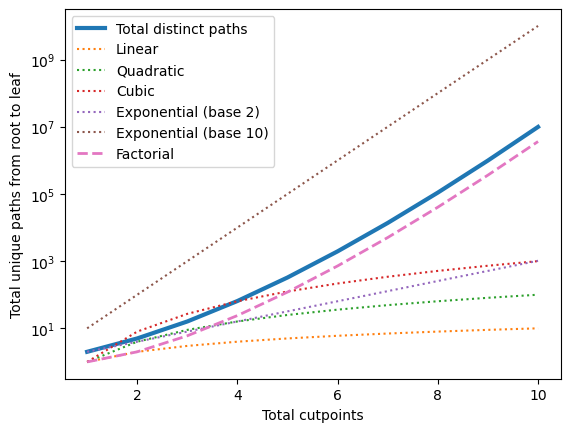

In [29]:
node_counts = range(smallest,largest)
cutpoint_counts = [x-2 for x in node_counts]
cutpoint_counts = cutpoint_counts[1:]

plt.plot(cutpoint_counts, path_lengths[1:], label = "Total distinct paths", linewidth = 3)
#plt.ylim((1,max(path_lengths)))
plt.yscale("log")
plt.plot(cutpoint_counts, [x for x in cutpoint_counts], label = "Linear", linestyle = "dotted")
plt.plot(cutpoint_counts, [x**2 for x in cutpoint_counts], label = "Quadratic", linestyle = "dotted")
plt.plot(cutpoint_counts, [x**3 for x in cutpoint_counts], label = "Cubic", linestyle = "dotted")
#plt.plot(cutpoint_counts, [np.log(x) for x in cutpoint_counts], label = "Log (base 2)", linestyle = "dotted")
plt.plot(cutpoint_counts, [2**x for x in cutpoint_counts], label = "Exponential (base 2)", linestyle = "dotted")
plt.plot(cutpoint_counts, [10**x for x in cutpoint_counts], label = "Exponential (base 10)", linestyle = "dotted")
plt.plot(cutpoint_counts, [math.factorial(x) for x in cutpoint_counts], label = "Factorial", linestyle = "dashed", linewidth = 2)
plt.legend(loc = "upper left")
plt.xlabel("Total cutpoints")
plt.ylabel("Total unique paths from root to leaf")
plt.show()
plt.close()

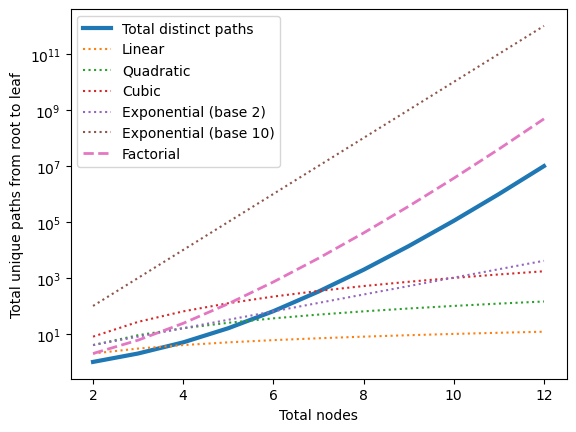

In [30]:
node_counts = range(smallest,largest)

plt.plot(node_counts, path_lengths, label = "Total distinct paths", linewidth = 3)
#plt.ylim((1,max(path_lengths)))
plt.yscale("log")
plt.plot(node_counts, [x for x in node_counts], label = "Linear", linestyle = "dotted")
plt.plot(node_counts, [x**2 for x in node_counts], label = "Quadratic", linestyle = "dotted")
plt.plot(node_counts, [x**3 for x in node_counts], label = "Cubic", linestyle = "dotted")
#plt.plot(node_counts, [np.log(x) for x in node_counts], label = "Log (base 2)", linestyle = "dotted")
plt.plot(node_counts, [2**x for x in node_counts], label = "Exponential (base 2)", linestyle = "dotted")
plt.plot(node_counts, [10**x for x in node_counts], label = "Exponential (base 10)", linestyle = "dotted")
plt.plot(node_counts, [math.factorial(x) for x in node_counts], label = "Factorial", linestyle = "dashed", linewidth = 2)
plt.legend(loc = "upper left")
plt.xlabel("Total nodes")
plt.ylabel("Total unique paths from root to leaf")
plt.show()
plt.close()

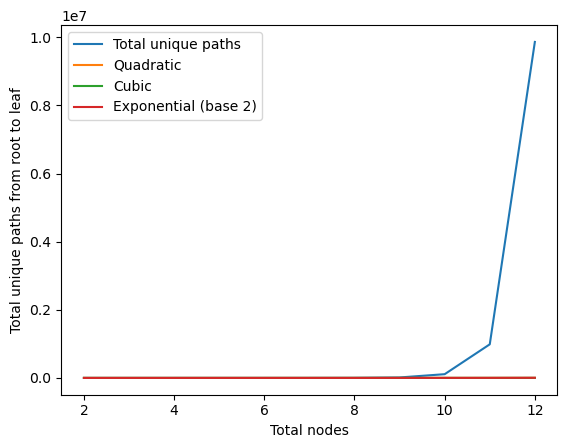

In [9]:
node_counts = range(smallest,largest)

plt.plot(node_counts, path_lengths, label = "Total unique paths")
#plt.ylim((1,max(path_lengths)))
#plt.yscale("log")
plt.plot(node_counts, [x**2 for x in node_counts], label = "Quadratic")
plt.plot(node_counts, [x**3 for x in node_counts], label = "Cubic")
#plt.plot(node_counts, [np.log(x) for x in node_counts], label = "Log_2")
plt.plot(node_counts, [2**x for x in node_counts], label = "Exponential (base 2)")
#plt.plot(node_counts, [math.factorial(x) for x in node_counts], label = "Factorial")
#plt.plot(node_counts, [10**x for x in node_counts], label = "Exponential (base 10)")
plt.legend(loc = "upper left")
plt.xlabel("Total nodes")
plt.ylabel("Total unique paths from root to leaf")
plt.show()
plt.close()

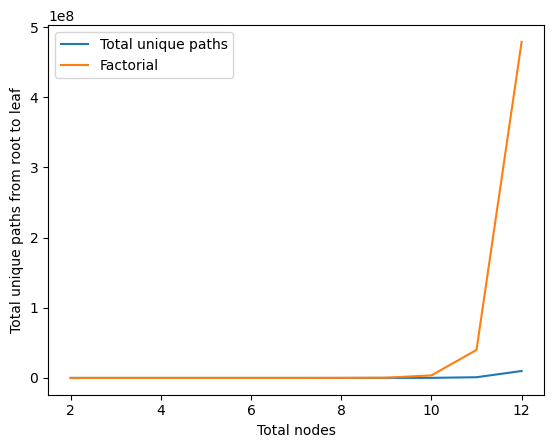

In [10]:
node_counts = range(smallest,largest)

plt.plot(node_counts, path_lengths, label = "Total unique paths")
#plt.ylim((1,max(path_lengths)))
#plt.plot(node_counts, [x**2 for x in node_counts], label = "Quadratic")
#plt.plot(node_counts, [x**3 for x in node_counts], label = "Cubic")
#plt.plot(node_counts, [np.log(x) for x in node_counts], label = "Log_2")
#plt.plot(node_counts, [2**x for x in node_counts], label = "Exponential (base 2)")
plt.plot(node_counts, [math.factorial(x) for x in node_counts], label = "Factorial")
#plt.plot(node_counts, [10**x for x in node_counts], label = "Exponential (base 10)")
plt.legend(loc = "upper left")
plt.xlabel("Total nodes")
plt.ylabel("Total unique paths from root to leaf")
plt.show()
plt.close()

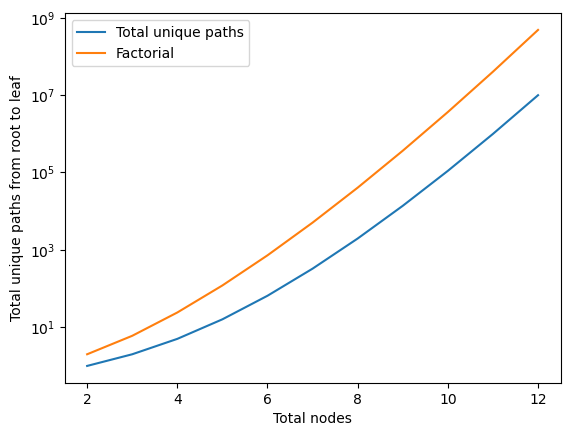

In [11]:
node_counts = range(smallest,largest)

plt.plot(node_counts, path_lengths, label = "Total unique paths")
plt.yscale("log")
#plt.ylim((1,max(path_lengths)))
#plt.plot(node_counts, [x**2 for x in node_counts], label = "Quadratic")
#plt.plot(node_counts, [x**3 for x in node_counts], label = "Cubic")
#plt.plot(node_counts, [np.log(x) for x in node_counts], label = "Log_2")
#plt.plot(node_counts, [2**x for x in node_counts], label = "Exponential (base 2)")
plt.plot(node_counts, [math.factorial(x) for x in node_counts], label = "Factorial")
#plt.plot(node_counts, [10**x for x in node_counts], label = "Exponential (base 10)")
plt.legend(loc = "upper left")
plt.xlabel("Total nodes")
plt.ylabel("Total unique paths from root to leaf")
plt.show()
plt.close()

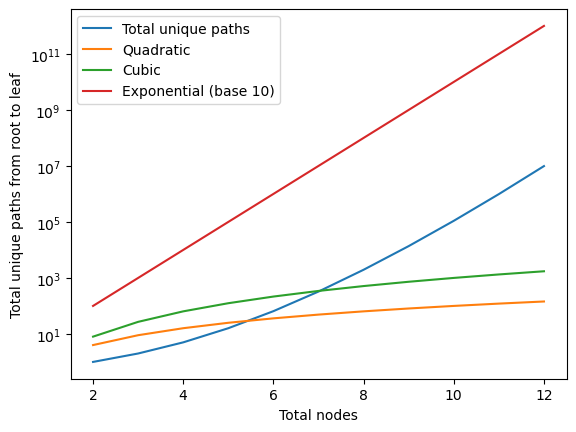

In [12]:
node_counts = range(smallest,largest)

plt.plot(node_counts, path_lengths, label = "Total unique paths")
#plt.ylim((1,max(path_lengths)))
plt.yscale("log")
plt.plot(node_counts, [x**2 for x in node_counts], label = "Quadratic")
plt.plot(node_counts, [x**3 for x in node_counts], label = "Cubic")
#plt.plot(node_counts, [np.log(x) for x in node_counts], label = "Log_2")
#plt.plot(node_counts, [2**x for x in node_counts], label = "Exponential (base 2)")
plt.plot(node_counts, [10**x for x in node_counts], label = "Exponential (base 10)")
plt.legend(loc = "upper left")
plt.xlabel("Total nodes")
plt.ylabel("Total unique paths from root to leaf")
plt.show()
plt.close()

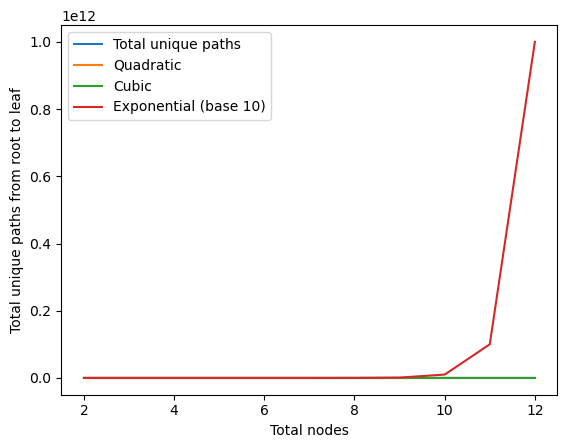

In [13]:
node_counts = range(smallest,largest)

plt.plot(node_counts, path_lengths, label = "Total unique paths")
#plt.ylim((1,max(path_lengths)))
plt.plot(node_counts, [x**2 for x in node_counts], label = "Quadratic")
plt.plot(node_counts, [x**3 for x in node_counts], label = "Cubic")
#plt.plot(node_counts, [np.log(x) for x in node_counts], label = "Log_2")
#plt.plot(node_counts, [2**x for x in node_counts], label = "Exponential (base 2)")
plt.plot(node_counts, [10**x for x in node_counts], label = "Exponential (base 10)")
plt.legend(loc = "upper left")
plt.xlabel("Total nodes")
plt.ylabel("Total unique paths from root to leaf")
plt.show()
plt.close()

## End of document